### Downloading the dataset from kaggle for Telecom Company Churn Rate -> ###
***https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data/data***

## IMPORTING LIBRARY

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

____

## DATA PREPARATION AND DATA CLEANING

In [6]:
df = pd.read_csv('/Users/suryakameshmantha/work/Sem 4/Data Science/telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Feature Description

* customerID: Customer ID
* genderCustomer: gender (female, male)
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* PartnerWhether: the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* numAdminTickets: The number of Admin Ticket
* numTechTickets: The number of Tech Ticket
* Churn: Whether the customer churned or not (Yes or No)

### Checking for null values

In [8]:
null_values = df.isnull().sum()
null_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No column in our dataset has null values

### Checking data types for each column

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#### Total charges are in object type which should be float

### Numerical Data Analysis

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Number of missing rows

In [12]:
non_unique_customer_ids = df[df['customerID'].duplicated()]
non_unique_customer_ids

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Clearly there aren't any customer_Id which aren't unique so u can remove it

### Remove of Unecessary columns

In [13]:
df = df.drop('customerID',axis=1)

### Use label encoding to deal with categorical value

In [14]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) >=6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]

In [15]:
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

___

## Exploratory Data Analysis(EDA)

## Univariate Analysis

In [16]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

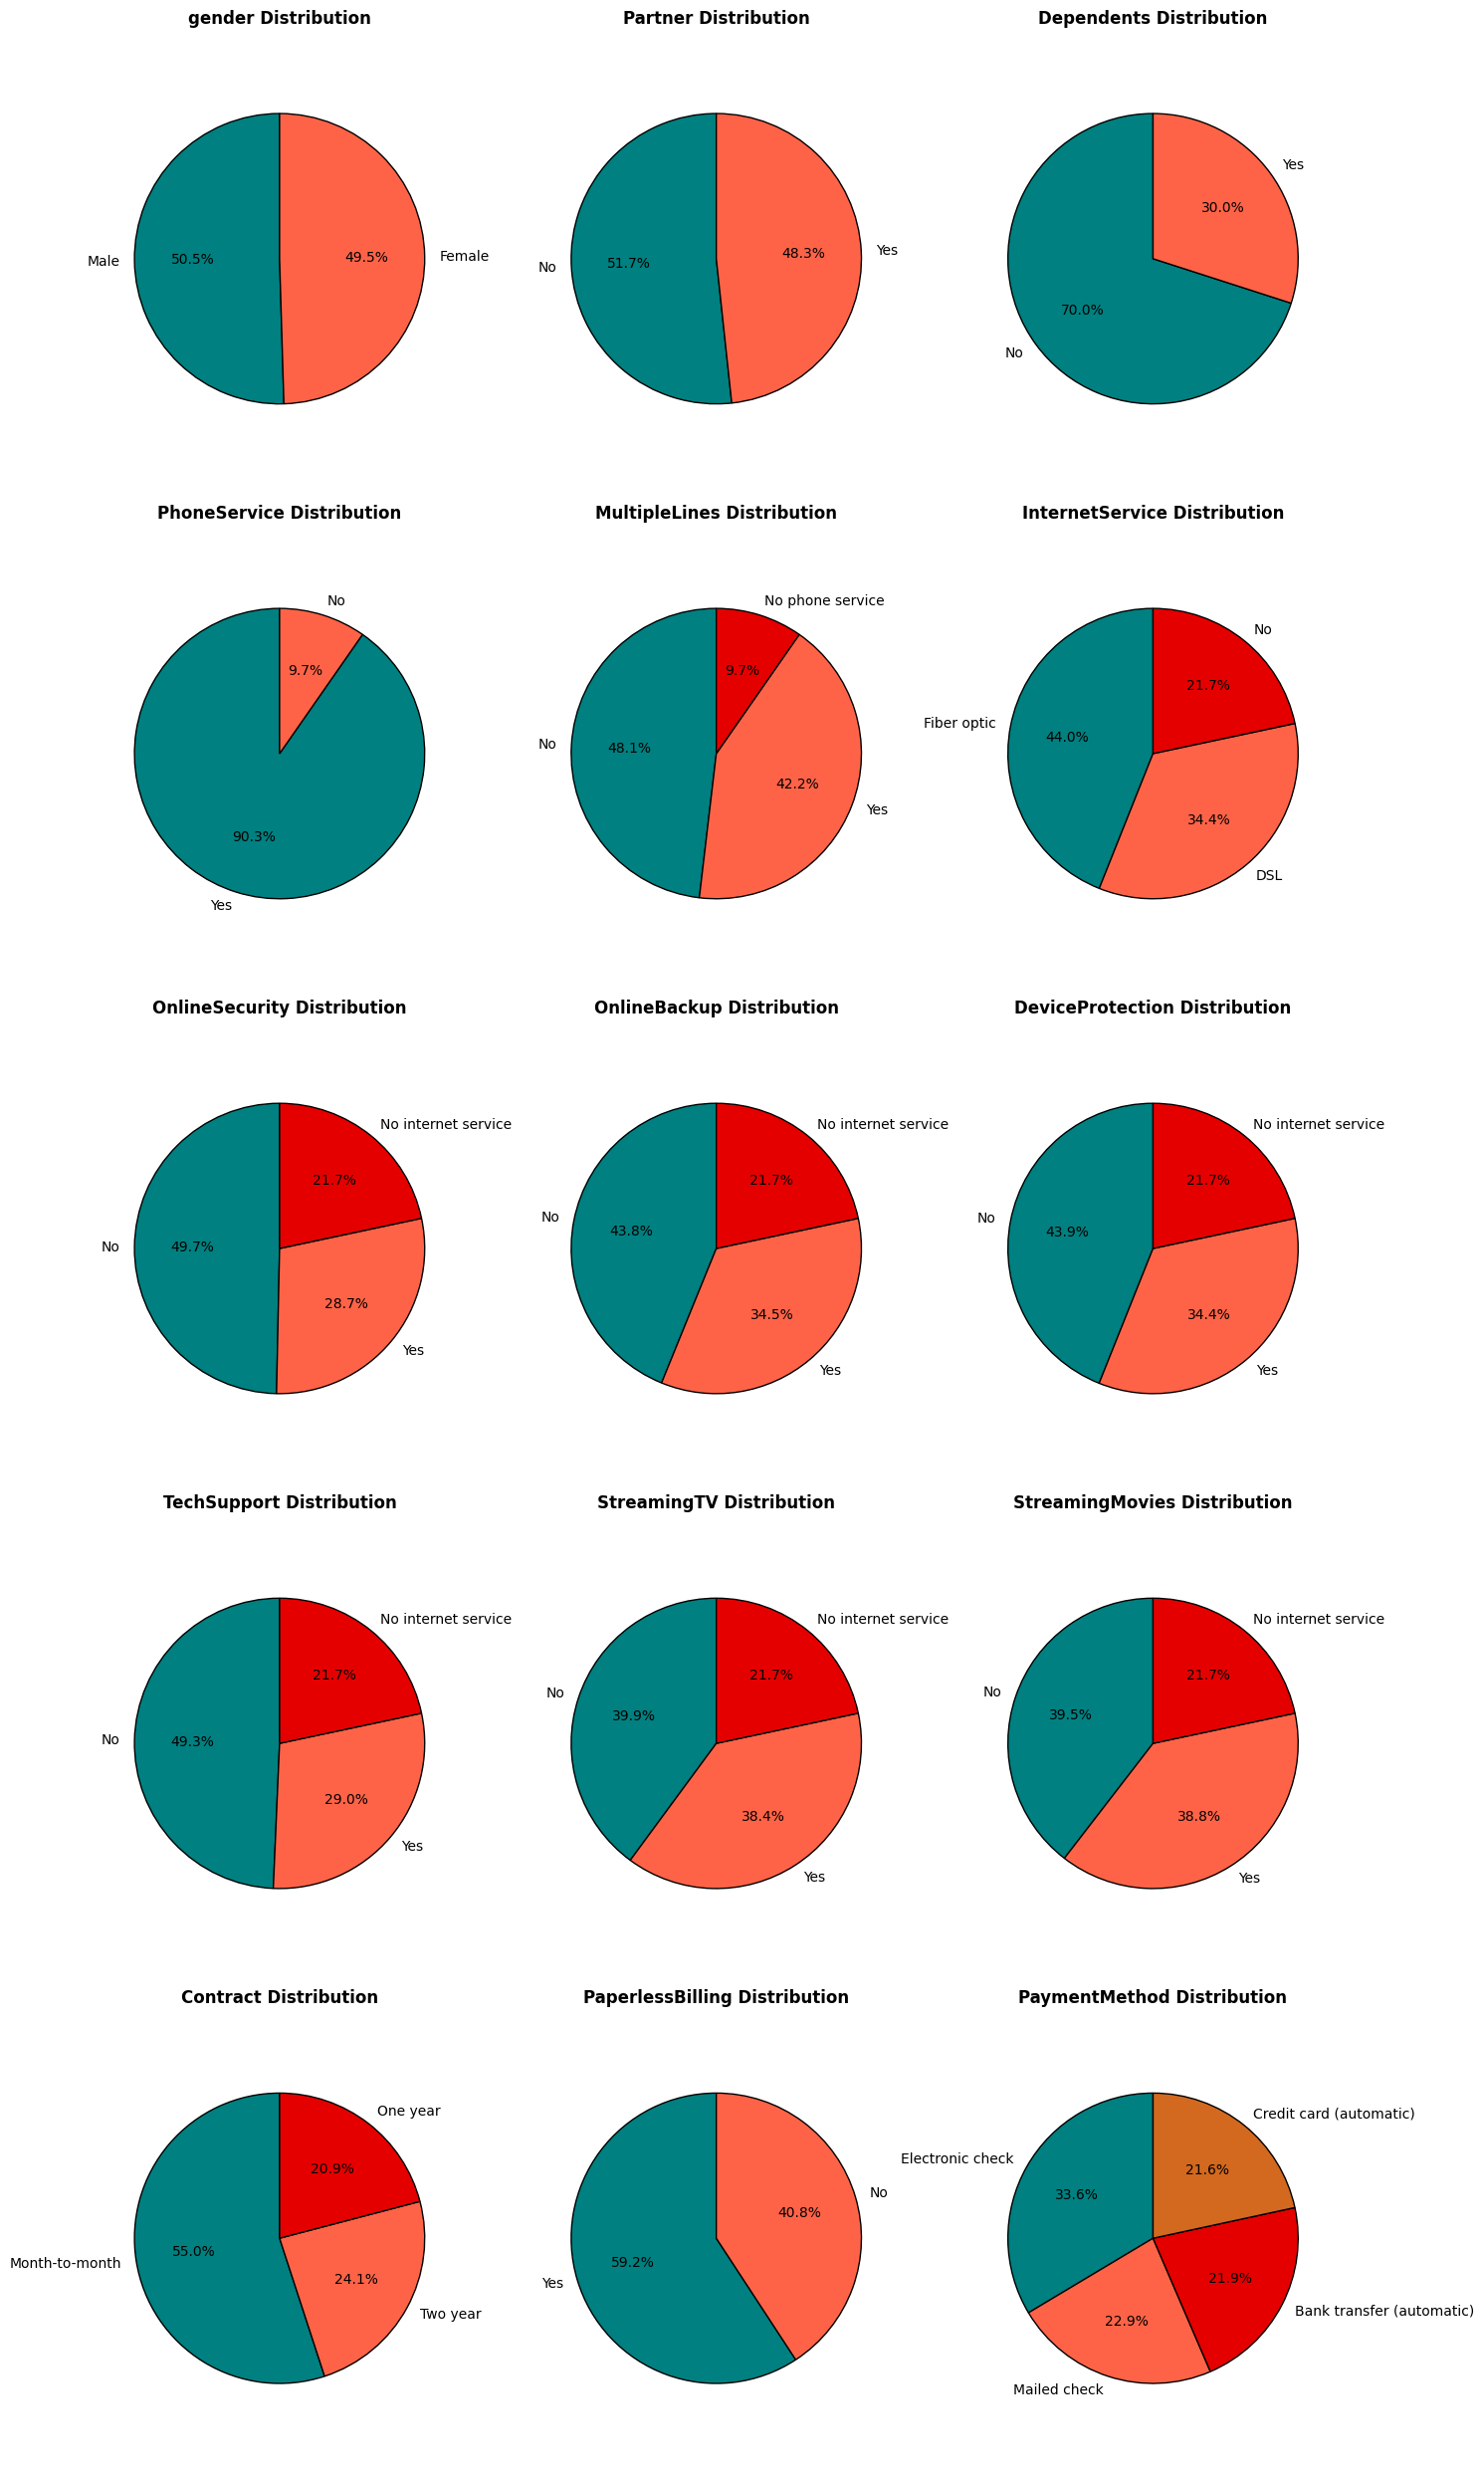

In [17]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    colors = palette if len(value_counts) <= 4 else palette2 * (len(value_counts) // 4 + 1)
    
    axes[idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, 
                  colors=colors[:len(value_counts)], wedgeprops={'edgecolor': 'black'})
    axes[idx].set_title(f'{column} Distribution', fontsize=12, fontweight='bold')
    axes[idx].axis('equal')  

for idx in range(len(categorical_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


### Demographic Insights  
#### Gender Distribution  
- Nearly equal distribution (50.5% male, 49.5% female).  
- Gender is unlikely to be a strong differentiator in customer behavior.  

#### Partner & Dependents Distribution  
- 48.3% have partners, while 51.7% do not.  
- Only 30% have dependents, meaning most customers might be single or without dependents.  
- This could impact contract preferences and service usage patterns.  

### Service Usage Insights  
#### Phone Service & Multiple Lines  
- 90.3% have phone service, showing high adoption.  
- Only 42.2% use multiple lines, indicating most customers prefer single-line usage.  

#### Internet Service & Related Features  
- 78.3% of customers use internet services.  
  - 44% use fiber optic, 34.4% use DSL, and 21.7% do not have internet.  
- Adoption of additional services is low:  
  - Online security (28.7%), Tech support (29%), Device protection (34.4%).  
  - Opportunity to upsell security and support services to existing users.  

#### Streaming Services  
- 38.4% use streaming TV, and 38.8% use streaming movies.  
- 21.7% do not have internet, automatically limiting streaming usage.  
- Opportunity to promote higher-speed internet plans for streaming users.  

### Contract & Payment Preferences  
#### Contract Preferences  
- 55% of customers are on month-to-month contracts.  
- Only 24.1% commit to two-year contracts, indicating a preference for flexibility.  
- This increases churn risk and requires proactive retention strategies.  

#### Billing & Payment Methods  
- 59.2% of customers prefer paperless billing, indicating digital adoption.  
- However, 33.6% still use mailed checks, showing a segment that prefers traditional payment methods.  
- Payment method preferences are diverse:  
  - Credit card (21.6%), bank transfer (21.9%), electronic check (40.8%).  
- Encouraging digital payment adoption could reduce costs and enhance customer experience.  


/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_726/672219777.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df,
/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_726/672219777.py:15: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(data = df,
/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_726/672219777.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])


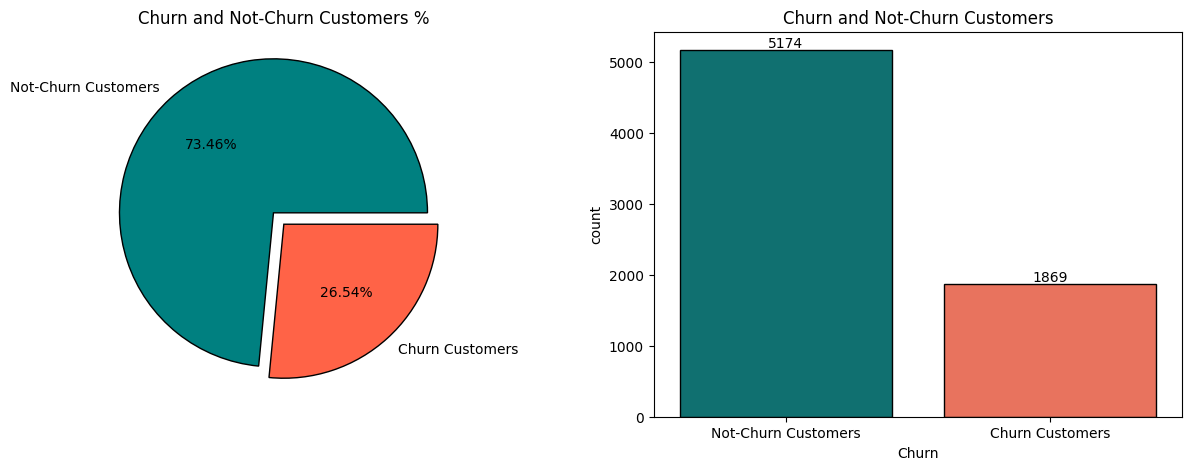

In [18]:

l1 = list(df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df, 
                   x='Churn',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

#### The visualizations indicate that 26.54% of customers have churned, while 73.46% have remained. This suggests that while churn is a concern, the majority of customers are retained, highlighting the need for strategies to further reduce churn.

### Distributions

### 1) Numerical features distibution

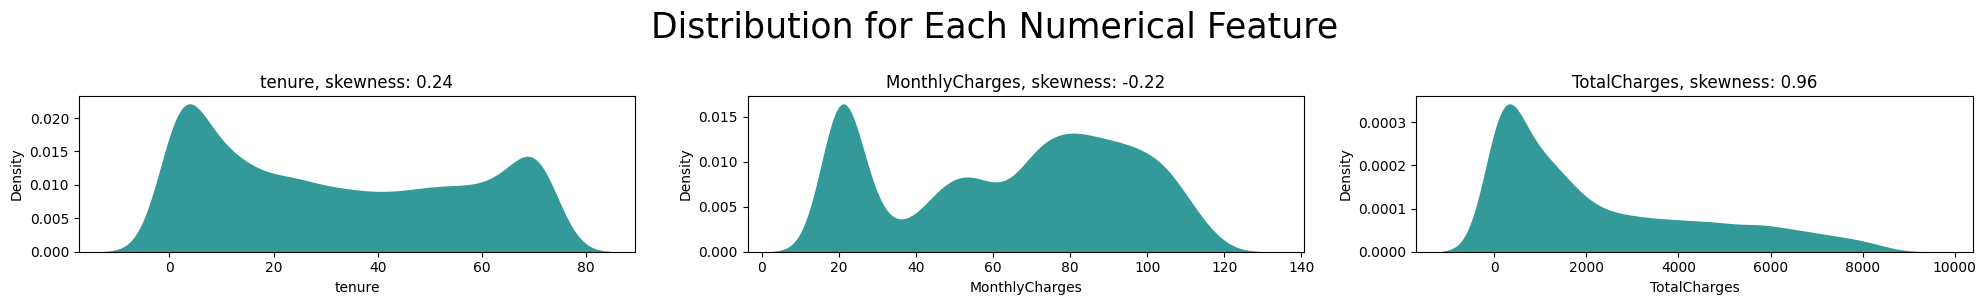

In [19]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 3))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(f"{data}, skewness: {round(dataset[data].skew(skipna=True), 2)}")
    
    plt.tight_layout()

dist_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distribution for Each Numerical Feature')


#### Insights from Distribution Plots:
- **Tenure**: The distribution is nearly symmetrical (skewness: 0.24), suggesting customers are spread across different tenure periods without strong bias toward new or long-term customers.
- **MonthlyCharges**: Slight left-skew (-0.22) indicates a higher concentration of customers with lower monthly charges.
- **TotalCharges**: Right-skewed (0.96) distribution suggests that while most customers have moderate total charges, a few have significantly high total charges.

### 2) Numerical features boxplot

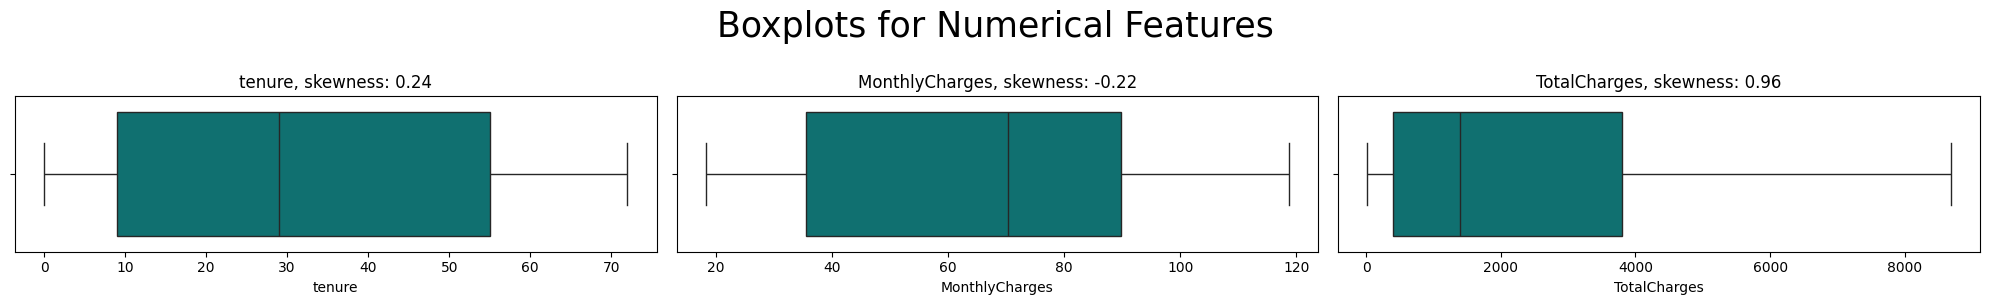

In [20]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 3))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    color = '#008080'
    
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], color=color)  
        axs[i].set_title(f"{data}, skewness: {round(dataset[data].skew(skipna=True), 2)}")
    
    plt.tight_layout()

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots for Numerical Features')


#### Insights from Boxplots:
- **Tenure**: A uniform spread without extreme outliers, meaning customers have diverse contract durations.
- **MonthlyCharges**: The spread is well-balanced, showing a range of monthly charges with no extreme anomalies.
- **TotalCharges**: The widest spread among all features, indicating high variability in customer spending over time, with potential high-value customers.

### Multivariate Analysis

### Numerical Features by Churn and not Churn

### 1) Monthly Charges and Total Charges

In [21]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_726/2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


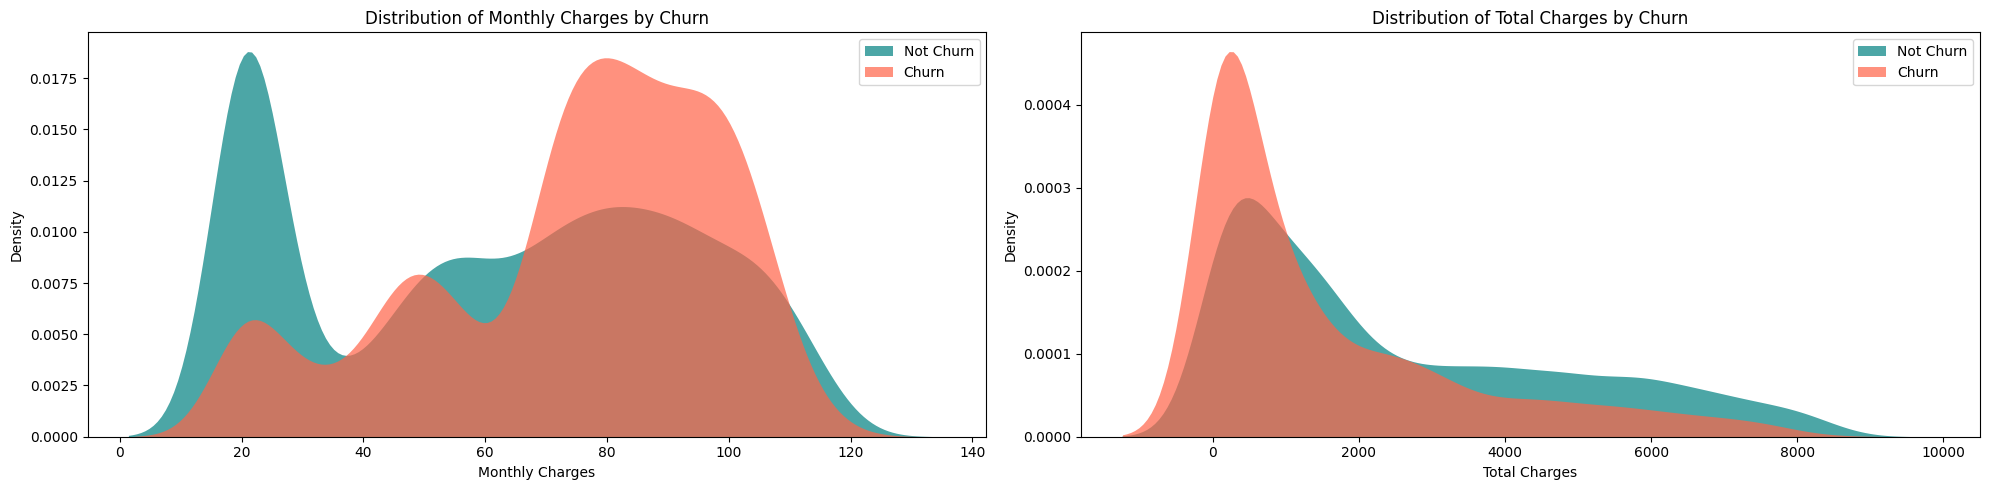

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0, ax=axes[0])
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0, ax=axes[0])
axes[0].legend(["Not Churn", "Churn"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_title('Distribution of Monthly Charges by Churn')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Ensure numeric type
sns.kdeplot(df.TotalCharges[df["Churn"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0, ax=axes[1])
sns.kdeplot(df.TotalCharges[df["Churn"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0, ax=axes[1])
axes[1].legend(["Not Churn", "Churn"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Total Charges')
axes[1].set_title('Distribution of Total Charges by Churn')

plt.tight_layout()
plt.show()


#### **Insights from Distribution of Monthly Charges by Churn**
- **Customers who churn (red) tend to have higher Monthly Charges.**  
- The overlapping region suggests that churn is more likely at moderate to high Monthly Charges.

---

#### **Insights from Distribution of Total Charges by Churn**
- **Customers with lower Total Charges are more likely to churn.**  
- **Non-churned customers generally have higher Total Charges, indicating longer tenure.**  
- This suggests that newer customers or those with lower cumulative spending are more prone to churn.


### 2) Tenure

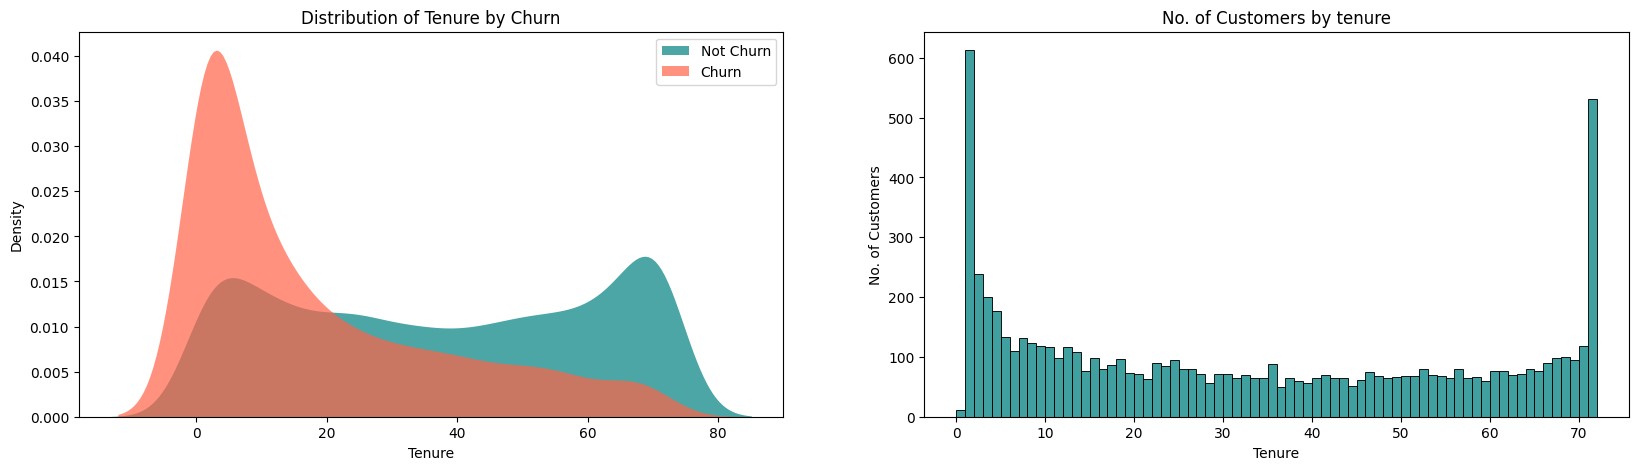

In [23]:

#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(df["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

#### **Insights from Distribution of Tenure by Churn**
- **Customers with lower tenure (less than ~20 months) have a significantly higher churn rate.**  
- **Customers with longer tenure (above ~50 months) are more likely to stay.**  
- The pattern suggests that churn is more common among newer customers.

---

#### **Insights from No. of Customers by Tenure**
- **A large number of customers have very short tenure (~0 months), possibly indicating trial users or early dropouts.**  
- **There is another peak at the maximum tenure (~72 months), suggesting a loyal customer segment.**  
- The distribution highlights the importance of customer retention strategies for early-stage customers.


### 3) Contract

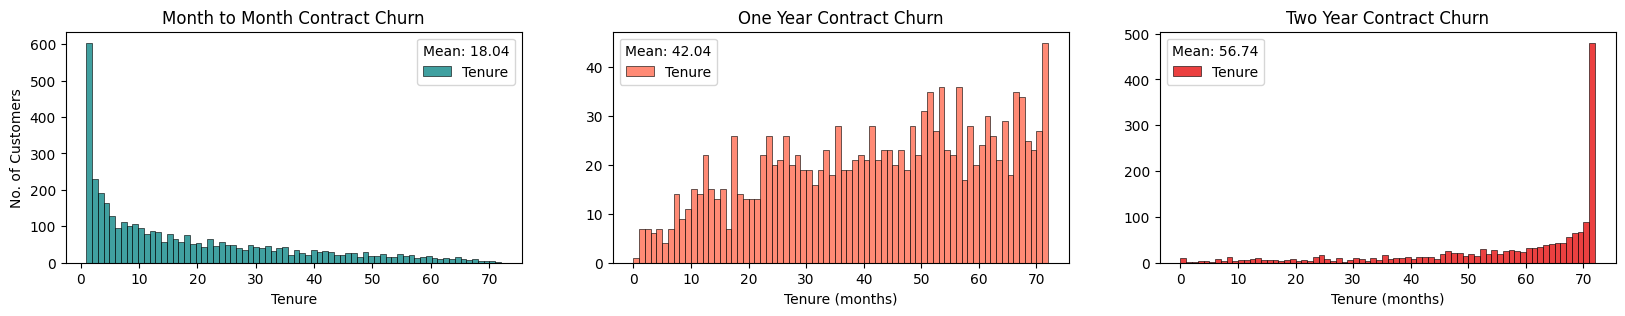

In [24]:

two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()

#### **Insights from Contract-Based Churn Distribution**
1. **Month-to-Month Contract Churn**  
   - **Highest churn rate is seen in early months**, particularly around 0-10 months.  
   - **Mean tenure is 18.04 months**, indicating short-term customer engagement.  
   - Indicates that customers on month-to-month contracts are more likely to churn early.

2. **One-Year Contract Churn**  
   - **Churn distribution is more evenly spread out**, with churn occurring at different tenure points.  
   - **Mean tenure is 42.04 months**, showing that customers tend to stay longer than those on monthly contracts.  
   - Suggests that **longer contracts improve retention but do not entirely prevent churn**.

3. **Two-Year Contract Churn**  
   - **Majority of churn happens towards the end of the contract (~70 months)**.  
   - **Mean tenure is 56.74 months**, the highest among all contract types.  
   - Indicates that customers who commit to long-term contracts **generally stay for the full term** before deciding to leave.


### 4) Scatter plot by Total Charge, Monthly Charge and Tenure

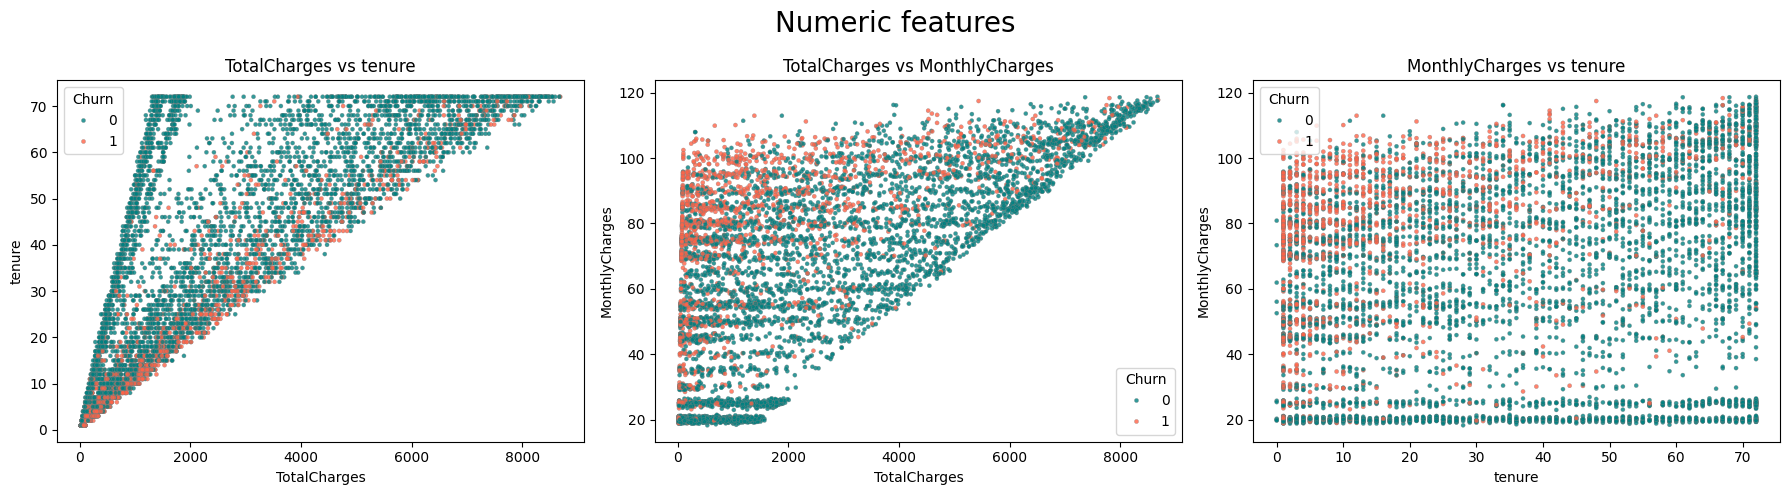

In [25]:

palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
ax1 = sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn",
                    data = df, palette = palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs tenure')

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x = df['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout()
plt.show()

#### **Insights from Numeric Feature Analysis**
1. **TotalCharges vs Tenure (Left Plot)**
   - **Strong positive correlation between TotalCharges and Tenure**, forming an upward triangular pattern.
   - **Churn (red dots) is more concentrated in the lower TotalCharges and lower tenure range**, indicating that new customers with low total spending are more likely to churn.
   - Long-tenure customers have high TotalCharges and rarely churn.

2. **TotalCharges vs MonthlyCharges (Middle Plot)**
   - Customers with **higher MonthlyCharges** (above ~$70) appear to have more churn instances.
   - Lower MonthlyCharges correspond to lower TotalCharges, with fewer churn cases.
   - Indicates that customers with high bills may feel dissatisfied and churn early.

3. **MonthlyCharges vs Tenure (Right Plot)**
   - Churn is **higher among customers with high MonthlyCharges and low tenure**.
   - **Long-tenure customers tend to have lower MonthlyCharges**, implying loyalty may be tied to affordability.
   - New customers with high bills churn more frequently, possibly due to pricing concerns.

#### **Key Takeaways**
- **Customers with low tenure and high MonthlyCharges are at higher risk of churn.**
- **Long-term customers have lower churn probability, often with lower MonthlyCharges.**
- **Customer retention strategies should focus on early-stage users, especially those with high MonthlyCharges.**


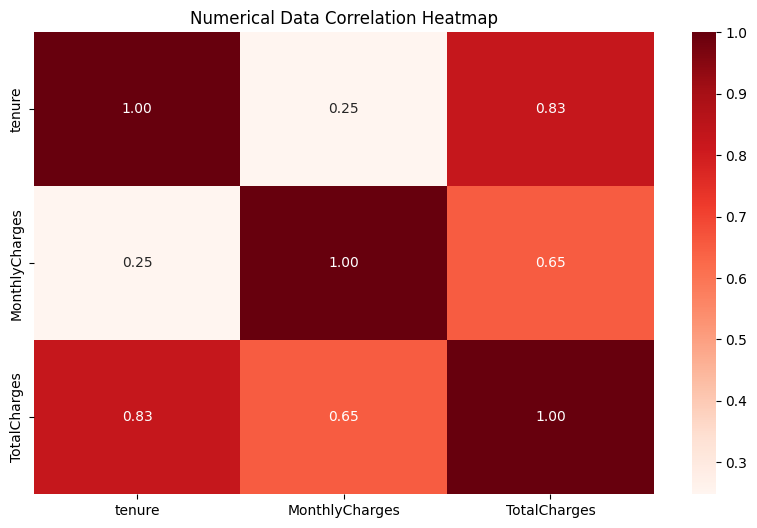

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="Reds", fmt=".2f")
plt.title("Numerical Data Correlation Heatmap")
plt.show()


### Categorical Features by Churn and not Churn

In [ ]:

list1 = ['gender','SeniorCitizen','Partner','Dependents']
hue = "Churn"
figsize = (30,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=4, figsize=figsize, hue = hue, palette = palette, suptitle='Customer information vs Target Variable (Churn)')
plt.tight_layout()

In [ ]:

gender = df1[df1['Churn'] == 1]['gender'].value_counts()
pie_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
pie_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
pie_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
pie_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]

In [ ]:

ax,fig = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

plt.subplot(1,4,1)
plt.pie(pie_values1,labels = ['Female','Male'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender (Churn)')

plt.subplot(1,4,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen (Churn)')

plt.subplot(1,4,3)
plt.pie(pie_values3,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner (Churn)')

plt.subplot(1,4,4)
plt.pie(pie_values4,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents (Churn)')

plt.show()

#### Insights from Customer Churn Analysis

#### 1. **Gender vs Churn**
- The number of male and female customers is nearly equal.
- Churn rates appear similar across genders, suggesting that gender is not a strong predictor of customer churn.

#### 2. **Senior Citizens vs Churn**
- Senior citizens have a significantly higher churn rate compared to non-senior customers.
- This indicates that older customers may be more likely to leave, possibly due to pricing, service preferences, or digital adaptability.

#### 3. **Partner Status vs Churn**
- Customers with a partner are less likely to churn compared to those without a partner.
- This suggests that having a partner might contribute to service retention, possibly due to shared financial responsibilities or bundled services.

#### 4. **Dependents vs Churn**
- Customers with dependents have a lower churn rate compared to those without dependents.
- This may indicate that family responsibilities contribute to long-term service retention, possibly due to the necessity of continuity in service.


**2) Provided services by Churn and not Churn**

In [ ]:

list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
ax = sns.countplot(data = df, x=list2[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[0] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,2)
ax = sns.countplot(data = df, x=list2[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[1] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,3)
ax = sns.countplot(data = df, x=list2[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[2] + ' vs Churn'
plt.title(title)

plt.subplot(2,3,4)
ax = sns.countplot(data = df, x=list2[3], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[3] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,5)
ax = sns.countplot(data = df, x=list2[4], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[4] + ' vs Churn'
plt.title(title);

plt.tight_layout()
plt.show()

In [ ]:

phone = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

In [ ]:

fig = plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')

plt.subplot(2,3,2)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines (Churn)')

plt.subplot(2,3,3)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService (Churn)')

plt.subplot(2,3,4)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV (Churn)')

plt.subplot(2,3,5)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies (Churn)')

plt.tight_layout()
plt.show()

#### Customer Churn Analysis

#### 1. Phone Service and Multiple Lines Impact on Churn
- **Phone Service**:  
  - 90.9% of customers have phone service, while 9.1% do not.  
  - Churn rates among customers with phone service appear higher than those without.  

- **Multiple Lines**:  
  - 45.43% of customers do not have multiple lines, while 45.48% have them.  
  - Customers with multiple lines have a higher churn rate compared to those with a single line.  

#### 2. Internet Service and Churn Behavior
- **Internet Service**:  
  - The majority (69.4%) of customers use fiber optic internet, followed by DSL (24.56%).  
  - Customers with fiber optic service have a significantly higher churn rate compared to DSL users.  
  - A small fraction (6.05%) have no internet service and exhibit lower churn rates.  

#### 3. Streaming Services and Their Influence on Churn
- **Streaming TV**:  
  - Almost equal distribution between customers with and without Streaming TV.  
  - Customers who subscribe to Streaming TV services have a slightly higher churn rate.  

- **Streaming Movies**:  
  - Similar to Streaming TV, customers who use Streaming Movies have a higher churn rate.  
  - Customers without internet service show significantly lower churn rates.  


**3) Payments by Churn and not Churn**

In [ ]:

list3 = ['Contract','PaperlessBilling','PaymentMethod']

fig = plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(data = df, x=list3[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(data = df, x=list3[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(data = df, x=list3[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])
title = list3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

In [ ]:

contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100] 

payment = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100] 

In [ ]:

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))

plt.subplot(1,3,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')

plt.subplot(1,3,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing (Churn)')

plt.subplot(1,3,3)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method (Churn)')

plt.show()

### Customer Churn Analysis Insights

#### 1. Contract Type and Churn
- Customers on **month-to-month contracts** have a significantly higher churn rate.
- **Long-term contracts (one-year or two-year)** are associated with lower churn rates.
- Encouraging customers to opt for longer contracts through discounts or benefits could help reduce churn.

#### 2. Paperless Billing and Churn
- Customers who use **paperless billing** have a higher churn rate than those who do not.
- This may indicate that digital-only users are more likely to switch providers.
- Enhancing engagement and communication with paperless billing users could help retain them.

#### 3. Payment Method and Churn
- **Electronic check users** show the highest churn rate, accounting for over **57% of total churned customers**.
- Customers using **bank transfers, credit cards, or mailed checks** have significantly lower churn rates.
- Encouraging electronic check users to switch to more stable payment methods could reduce churn.

### 📌 Key Takeaways from Customer Churn Analysis  

#### 1️⃣ Contract Type Matters  
- **Month-to-month contracts** have the highest churn rate.  
- Customers with **long-term contracts (1-year or 2-year)** are far less likely to churn.  
- **Strategy:** Offer discounts or perks for long-term commitments to improve retention.  

#### 2️⃣ Paperless Billing Users are More Likely to Churn  
- A significant portion of customers using **paperless billing** tend to leave.  
- **Possible reasons:** Digital-only users may switch providers easily, lack engagement, or feel disconnected.  
- **Strategy:** Improve digital touchpoints, personalized engagement, and better customer service for paperless billing users.  

#### 3️⃣ Payment Method Plays a Role in Churn  
- **Electronic check users have the highest churn rate (~57%)**, while customers using **credit cards, bank transfers, or mailed checks** are more loyal.  
- **Possible reasons:** Electronic check users may experience more payment failures, or they might be less committed customers.  
- **Strategy:** Encourage users to switch to automated payment methods (credit card/bank transfer) through incentives or awareness campaigns.  

### 🚀 Final Recommendations  
✅ **Convert month-to-month users** to long-term contracts with discounts and perks.  
✅ **Enhance engagement for paperless billing users** via personalized offers or proactive support.  
✅ **Promote stable payment methods** to reduce churn among electronic check users.  

**Focusing on these areas can significantly improve customer retention and reduce churn.**  


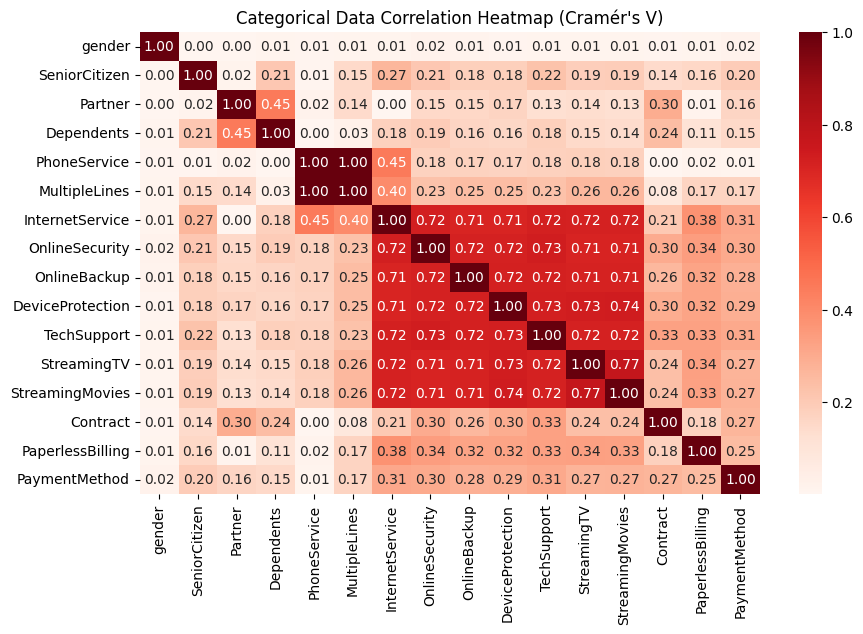

In [32]:
def cramers_v(x, y):
    """Calculate Cramér's V for categorical correlation."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
cramers_matrix = pd.DataFrame(index=categoric_columns, columns=categoric_columns)

for col1 in categoric_columns:
    for col2 in categoric_columns:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1  
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title("Categorical Data Correlation Heatmap (Cramér's V)")
plt.show()

#### For dealing with categorical data we used Cramper V Rule

___

## Final Insights from Telecom Customer Churn Analysis

1. **Key Factors Influencing Churn:**
   - Customers with **longer tenure** are less likely to churn.
   - Higher churn rates were observed among **Fiber Optic users** compared to DSL users.
   - Customers with **no online security and no tech support** are more prone to churn.
   
2. **Demographic Trends:**
   - Senior citizens exhibit a higher churn rate, especially those without **partners or dependents**.
   - Gender does not significantly impact churn rates.
   
3. **Service-Related Trends:**
   - Customers with **multiple add-on services** (such as online security and backup) have higher retention.
   - Those with **month-to-month contracts** are more likely to leave compared to those with annual or two-year contracts.
   - **Electronic billing** is correlated with higher churn rates, potentially indicating dissatisfaction with automated processes.
   
4. **Financial Insights:**
   - Higher **monthly charges** lead to increased churn, especially for customers with multiple subscriptions.
   - Customers who opted for **automatic payment methods** tend to stay longer with the company.
   
5. **Recommendations for Retention:**
   - Offer **loyalty incentives** or discounts for long-term commitments.
   - Improve customer support and enhance digital services, especially for Fiber Optic users.
   - Promote bundled services with additional perks to encourage retention.
   - Address concerns with electronic billing by improving transparency and user experience.
   
By implementing these strategies, the company can effectively **reduce churn rates, enhance customer satisfaction, and drive long-term revenue growth**.

